# EDA of supermarket customer behaviour in a fictional supermarket

- sections are numbered according to the task given in Data Analysis webpage: https://krspiced.pythonanywhere.com/chapters/project_markov/data_analysis.html \
- dataframes are numbered according to the different tasks, if additional dataframes are necessary, they are labeled with _small alphabetical characters 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### read the data, starting by one day (monday) only

In [321]:
df = pd.read_csv('monday.csv', sep = ';')
df['datetime']=pd.to_datetime(df['timestamp'])
df['timestamp']=pd.to_datetime(df['timestamp'])
df.set_index('datetime', inplace = True)
df.head()

,timestamp,customer_no,location
datetime,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices


## 1. total number of customers at each station (and over time)

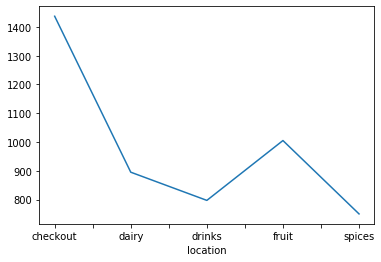

In [390]:
df.groupby('location')['customer_no'].count().plot()

### customers at different stations over time is aggregated to hours

In [396]:
df1 = df.copy()
df1['hour'] = df1['timestamp'].dt.hour
df1_a = pd.DataFrame(df1.groupby(['location', 'hour'])['customer_no'].count().reset_index())
df1_a.head()

,location,hour,customer_no
0,checkout,7,92
1,checkout,8,112
2,checkout,9,85
3,checkout,10,90
4,checkout,11,55


Text(0, 0.5, 'number of customers')

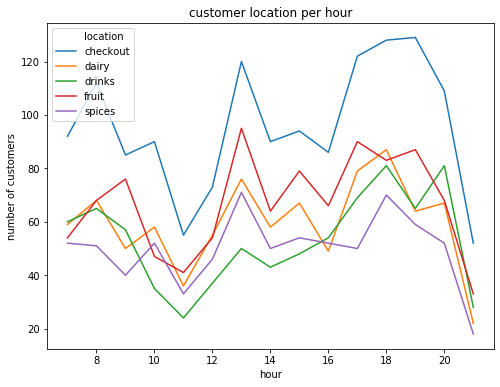

In [397]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'hour', y = 'customer_no', data = df1_a, hue = 'location')
plt.title('customer location per hour') 
plt.ylabel('number of customers')

## 2. time spent at each station 

### plot average time[minutes] per station

In [398]:
df2 = df.groupby('customer_no').resample('1T').ffill()

In [400]:
df2.drop(columns = 'customer_no', inplace = True)
df2.head()

timestamp  location prev_loc
customer_no datetime                                                  
1           2019-09-02 07:03:00 2019-09-02 07:03:00     dairy      NaN
            2019-09-02 07:04:00 2019-09-02 07:03:00     dairy      NaN
            2019-09-02 07:05:00 2019-09-02 07:05:00  checkout    dairy
2           2019-09-02 07:03:00 2019-09-02 07:03:00     dairy      NaN
            2019-09-02 07:04:00 2019-09-02 07:03:00     dairy      NaN

In [401]:
df2_a= df2.groupby(['customer_no', 'location'])[['timestamp']].count()
df2_a.reset_index(inplace = True)
df2_a.columns = ['customer_no', 'location', 'minutes']
df2_a.head()

,customer_no,location,minutes
0,1,checkout,1
1,1,dairy,2
2,2,checkout,1
3,2,dairy,3
4,3,checkout,1


Text(0, 0.5, 'minutes spend')

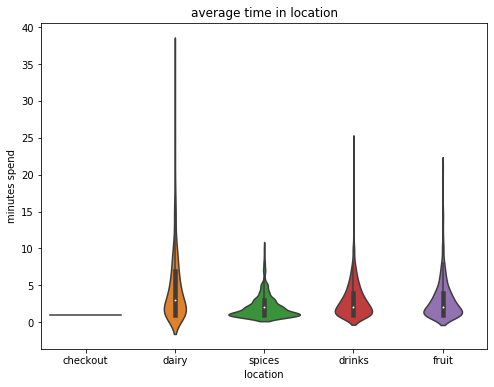

In [402]:
plt.figure(figsize = (8,6))
sns.violinplot(x = 'location', y = 'minutes', data = df2_a )
plt.title('average time in location')
plt.ylabel('minutes spend')

## 3. find the average time customers spend in the supermarket

In [405]:
df3 = pd.DataFrame((df.groupby('customer_no')['timestamp'].max())-(df.groupby('customer_no')['timestamp'].min()))
avg_time = ((df.groupby('customer_no')['timestamp'].max())-(df.groupby('customer_no')['timestamp'].min())).mean()
avg_time

Timedelta('0 days 00:06:26.371803')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27aa6450>]],
      dtype=object)

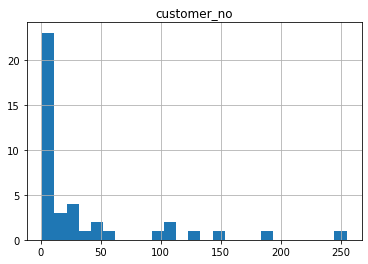

In [430]:
time_spent = (df.groupby('customer_no')['timestamp'].max())-(df.groupby('customer_no')['timestamp'].min())
sum_time_spent = pd.DataFrame(time_spent.reset_index().groupby('timestamp')['customer_no'].count())
sum_time_spent.reset_index(inplace = True)
sum_time_spent.hist(bins = 25)

### same as above, just with seaborn, which does not display the y-axis correctly (due to the timedelta-type)

Text(0.5, 0, 'number of customers')

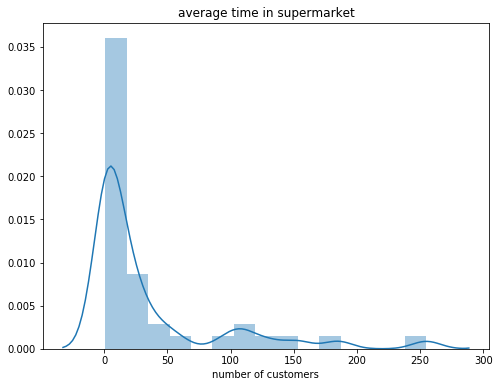

In [411]:
plt.figure(figsize = (8,6))
sns.distplot(sum_time_spend)
plt.title('average time in supermarket')
plt.xlabel('number of customers')
plt.ylabel('')

## 4. find the first location each customer attends and also each previous location

In [431]:
df4 = df.copy()
df4['prev_loc'] = df4.groupby('customer_no')['location'].shift(1)
df4.head()

,timestamp,customer_no,location,prev_loc
datetime,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,NaN
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,NaN


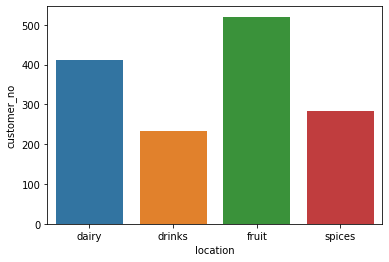

In [432]:
first_loc = df.loc[df4['prev_loc'].isna()].groupby('location')[['customer_no']].count()
first_loc.reset_index(inplace = True)
sns.barplot( x = 'location', y = 'customer_no', data = first_loc )

In [433]:
df4_a = df4.groupby('customer_no').resample('1T').ffill()
df4_a.head()

timestamp  customer_no  location  \
customer_no datetime                                                         
1           2019-09-02 07:03:00 2019-09-02 07:03:00            1     dairy   
            2019-09-02 07:04:00 2019-09-02 07:03:00            1     dairy   
            2019-09-02 07:05:00 2019-09-02 07:05:00            1  checkout   
2           2019-09-02 07:03:00 2019-09-02 07:03:00            2     dairy   
            2019-09-02 07:04:00 2019-09-02 07:03:00            2     dairy   

                                prev_loc  
customer_no datetime                      
1           2019-09-02 07:03:00      NaN  
            2019-09-02 07:04:00      NaN  
            2019-09-02 07:05:00    dairy  
2           2019-09-02 07:03:00      NaN  
            2019-09-02 07:04:00      NaN

In [434]:
df4_a.drop('customer_no',axis = 1, inplace = True)
df4_a.reset_index(inplace = True)
df4_a.head()

,customer_no,datetime,timestamp,location,prev_loc
0,1,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
1,1,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,NaN
2,1,2019-09-02 07:05:00,2019-09-02 07:05:00,checkout,dairy
3,2,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
4,2,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,NaN


In [435]:
df4_b = df4_a.loc[df4_a['location']!= 'checkout']
df4_b

,customer_no,datetime,timestamp,location,prev_loc
0,1,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
1,1,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,NaN
3,2,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
4,2,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,NaN
5,2,2019-09-02 07:05:00,2019-09-02 07:03:00,dairy,NaN
...,...,...,...,...,...
10759,1443,2019-09-02 21:48:00,2019-09-02 21:48:00,dairy,fruit
10760,1444,2019-09-02 21:48:00,2019-09-02 21:48:00,spices,NaN
10762,1445,2019-09-02 21:49:00,2019-09-02 21:49:00,dairy,NaN
10763,1446,2019-09-02 21:50:00,2019-09-02 21:50:00,dairy,NaN


### plot time spent at first and all the other locations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27458f10>]],
      dtype=object)

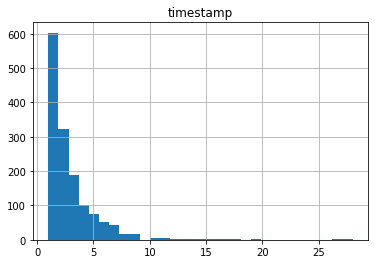

In [436]:
first_loc = pd.DataFrame(df4_b.loc[df_full2['prev_loc'].isna()].groupby('customer_no')['timestamp'].count())
first_loc.hist(bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27216a50>]],
      dtype=object)

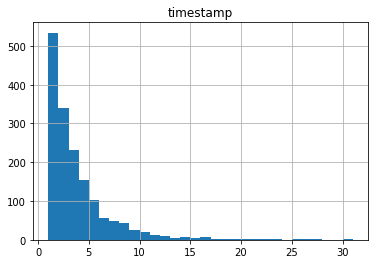

In [437]:
other_loc = pd.DataFrame(df4_b.loc[df_full2['prev_loc'].notna()].groupby(['customer_no', 'location'])['timestamp'].count())
other_loc.hist(bins = 30)

## 5. calculate transition probabilities
- two different methods, both with similar outcome

In [438]:
df5 = df.groupby('customer_no').resample('1T').ffill()
df5.drop(columns = 'customer_no', inplace = True)

In [439]:
df5.reset_index(inplace = True)
df5['prev_loc'] = df5.groupby('customer_no')['location'].shift(1)
df5.head(10)

,customer_no,datetime,timestamp,location,prev_loc
0,1,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
1,1,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,dairy
2,1,2019-09-02 07:05:00,2019-09-02 07:05:00,checkout,dairy
3,2,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,NaN
4,2,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,dairy
5,2,2019-09-02 07:05:00,2019-09-02 07:03:00,dairy,dairy
6,2,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,dairy
7,3,2019-09-02 07:04:00,2019-09-02 07:04:00,dairy,NaN
8,3,2019-09-02 07:05:00,2019-09-02 07:04:00,dairy,dairy
9,3,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,dairy


In [440]:
(df5['prev_loc']+ '->' + df5['location']).value_counts()

dairy->dairy        2600
fruit->fruit        1553
drinks->drinks      1250
fruit->checkout      524
spices->spices       478
drinks->checkout     426
dairy->checkout      310
spices->dairy        235
fruit->dairy         225
dairy->drinks        218
spices->drinks       217
drinks->fruit        186
dairy->spices        183
dairy->fruit         180
spices->checkout     177
drinks->spices       162
fruit->drinks        130
fruit->spices        122
spices->fruit        119
drinks->dairy         23
dtype: int64

In [441]:
df5_a = df5.groupby(['location', 'prev_loc'])['customer_no'].count()
df5_a.head()

location  prev_loc
checkout  dairy        310
          drinks       426
          fruit        524
          spices       177
dairy     dairy       2600
Name: customer_no, dtype: int64

In [442]:
ct = df5_a.unstack() 
ct

prev_loc,dairy,drinks,fruit,spices
location,,,,
checkout,310,426,524,177
dairy,2600,23,225,235
drinks,218,1250,130,217
fruit,180,186,1553,119
spices,183,162,122,478


In [212]:
p = (ct.T / ct.sum(axis = 1)).T

In [213]:
p

prev_loc,dairy,drinks,fruit,spices
location,,,,
checkout,0.215727,0.296451,0.364649,0.123173
dairy,0.843334,0.007460,0.072981,0.076224
drinks,0.120110,0.688705,0.071625,0.119559
fruit,0.088322,0.091266,0.762022,0.058391
spices,0.193651,0.171429,0.129101,0.505820


In [443]:
pd.crosstab(df5['location'], df5[ 'prev_loc'], normalize = 0)

prev_loc,dairy,drinks,fruit,spices
location,,,,
checkout,0.215727,0.296451,0.364649,0.123173
dairy,0.843334,0.007460,0.072981,0.076224
drinks,0.120110,0.688705,0.071625,0.119559
fruit,0.088322,0.091266,0.762022,0.058391
spices,0.193651,0.171429,0.129101,0.505820
